# Advanced usage using matplotlib

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn_evaluation import plot

import matplotlib.pyplot as plt

data = datasets.make_classification(
    n_samples=200, n_features=10, n_informative=5, class_sep=0.7
)
X = data[0]
y = data[1]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
est = RandomForestClassifier(n_estimators=10)
est.fit(X_train, y_train)
y_true = y_test
y_score = est.predict_proba(X_test)
est = RandomForestClassifier(n_estimators=3)
est.fit(X_train, y_train)
y_score2 = est.predict_proba(X_test)

As we mentioned in the previous section, using the functional interface provides great flexibility to evaluate your models, this sections includes some recipes for common tasks that involve the use of the matplotlib API.

## Changing plot style

sklearn-evaluation uses whatever configuration matplotlib has, if you want to change the style of the plots easily you can use one of the many styles available:

In [2]:
import matplotlib.style

matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Then change the style using

In [3]:
matplotlib.style.use("ggplot")

Let's see how a ROC curve looks with the new style:

<Axes: title={'center': 'ROC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

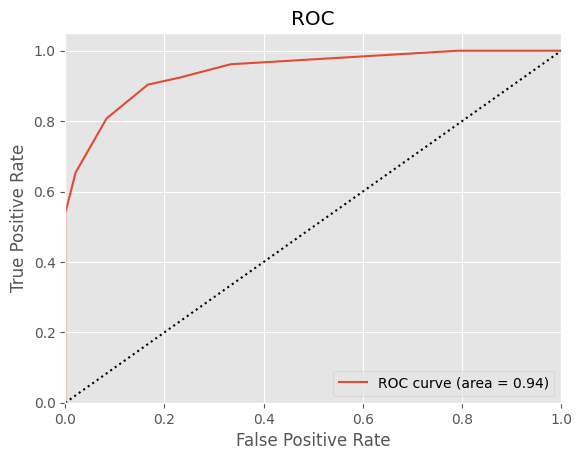

In [4]:
plot.roc(y_true, y_score)

In [5]:
matplotlib.style.use("classic")

## Saving plots

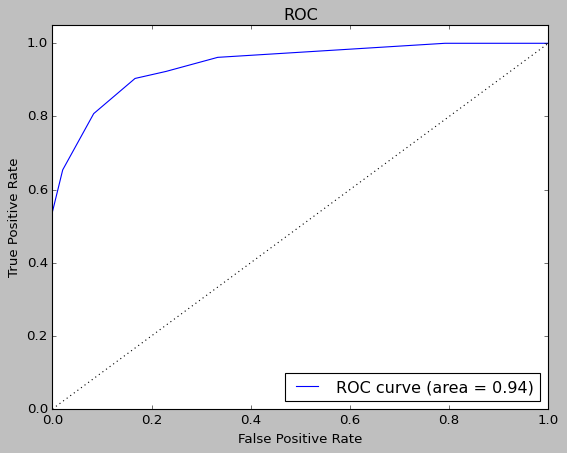

In [6]:
ax = plot.roc(y_true, y_score)
fig = ax.get_figure()
fig.savefig("my-roc-curve.png")

In [7]:
import os

os.remove("my-roc-curve.png")

## Comparing several models with one plot

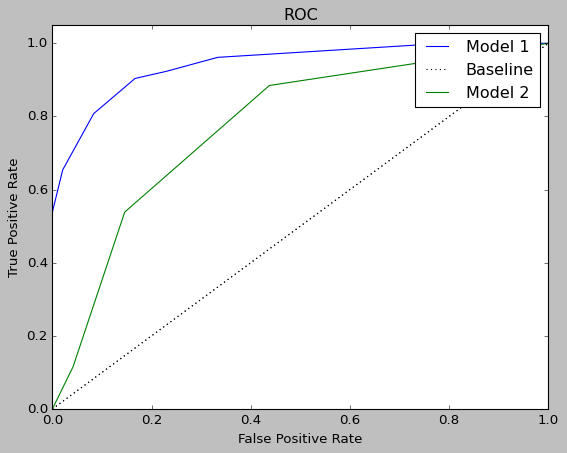

In [8]:
fig, ax = plt.subplots()
plot.roc(y_true, y_score, ax=ax)
plot.roc(y_true, y_score2, ax=ax)
ax.legend(["Model 1", "Baseline", "Model 2"])

## Grid Plots

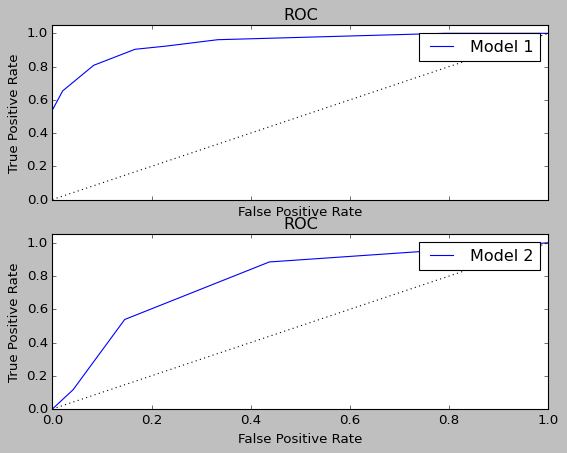

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
plot.roc(y_true, y_score, ax=ax1)
plot.roc(y_true, y_score2, ax=ax2)
ax1.legend(["Model 1"])
ax2.legend(["Model 2"])

## Customizing plots

Text(0.5, 1.0, 'This is a custom title')

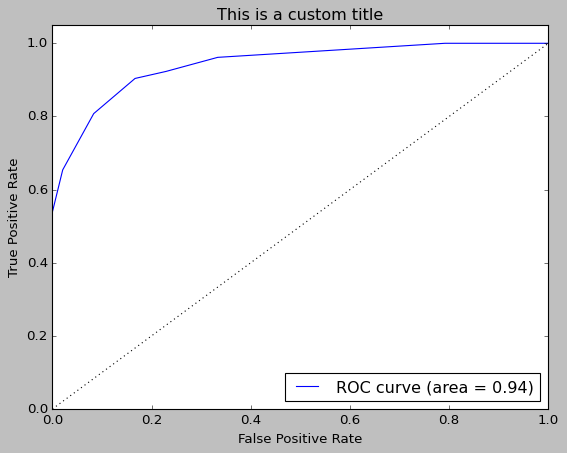

In [10]:
ax = plot.roc(y_true, y_score)
ax.set_title("This is a custom title")